Accuracy: 0.698237885462555
Classification Report:
              precision    recall  f1-score   support

         neg       0.69      0.88      0.77       209
         pos       0.71      0.73      0.72       175
         neu       0.83      0.07      0.13        70

    accuracy                           0.70       454
   macro avg       0.74      0.56      0.54       454
weighted avg       0.72      0.70      0.65       454



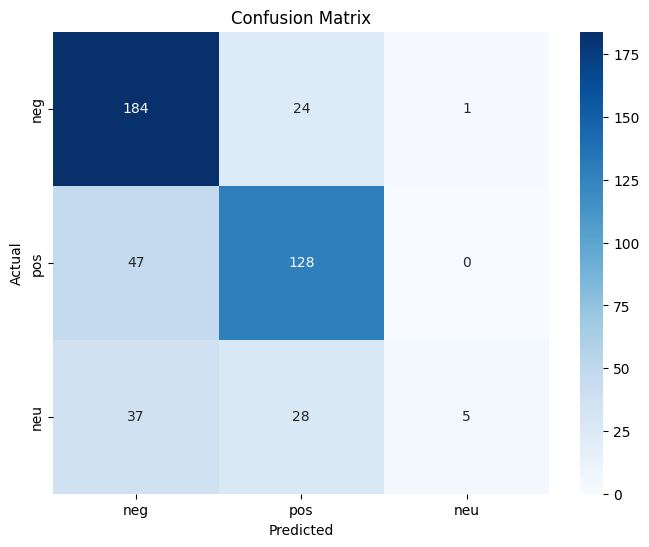

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from your file path
file_path = 'prastyo-sentiment_all.csv'  # Make sure this path is correct
df = pd.read_csv(file_path)

# Rename the columns for clarity
df.columns = ['text', 'sentiment']

# Encode the sentiment labels to numerical values
df['sentiment'] = df['sentiment'].map({'pos': 1, 'neg': 0, 'neu': 2})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42, stratify=df['sentiment'])

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model's accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['neg', 'pos', 'neu'])

# Print the results
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['neg', 'pos', 'neu'], yticklabels=['neg', 'pos', 'neu'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

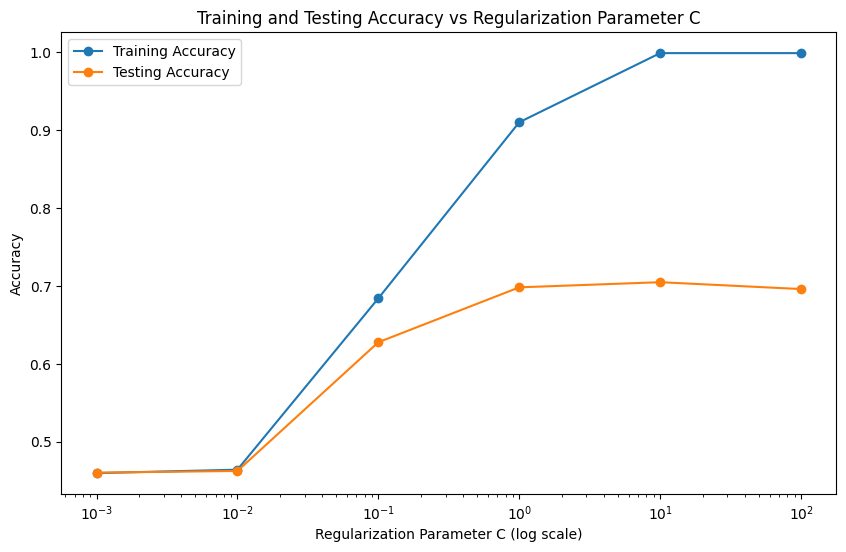

Final Model Accuracy: 0.698237885462555
Final Model Classification Report:
              precision    recall  f1-score   support

         neg       0.69      0.88      0.77       209
         pos       0.71      0.73      0.72       175
         neu       0.83      0.07      0.13        70

    accuracy                           0.70       454
   macro avg       0.74      0.56      0.54       454
weighted avg       0.72      0.70      0.65       454



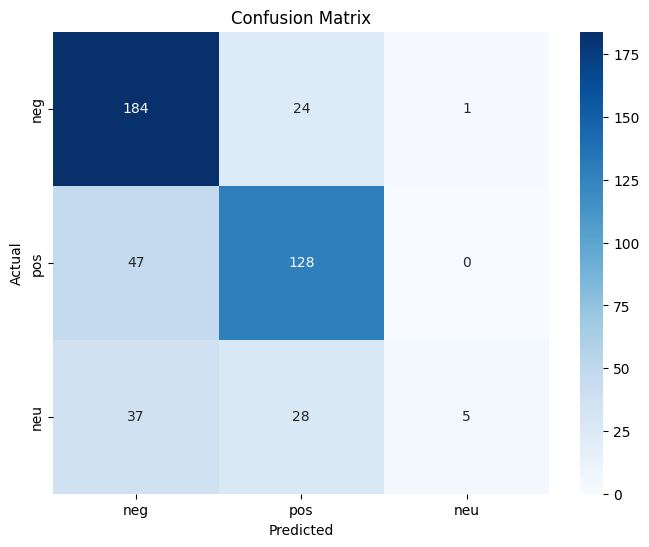

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from your file path
file_path = 'prastyo-sentiment_all.csv'  # Make sure this path is correct
df = pd.read_csv(file_path)

# Rename the columns for clarity
df.columns = ['text', 'sentiment']

# Encode the sentiment labels to numerical values
df['sentiment'] = df['sentiment'].map({'pos': 1, 'neg': 0, 'neu': 2})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42, stratify=df['sentiment'])

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Varying regularization parameter 'C' to simulate epochs
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
train_accuracies = []
test_accuracies = []

for C in C_values:
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train_tfidf, y_train)

    y_train_pred = model.predict(X_train_tfidf)
    y_test_pred = model.predict(X_test_tfidf)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting the training and testing accuracies
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(C_values, test_accuracies, marker='o', label='Testing Accuracy')
plt.xscale('log')
plt.xlabel('Regularization Parameter C (log scale)')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs Regularization Parameter C')
plt.legend()
plt.show()

# Final model evaluation
final_model = LogisticRegression(C=1, max_iter=1000)
final_model.fit(X_train_tfidf, y_train)
y_pred = final_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['neg', 'pos', 'neu'])

print(f'Final Model Accuracy: {accuracy}')
print('Final Model Classification Report:')
print(classification_rep)

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['neg', 'pos', 'neu'], yticklabels=['neg', 'pos', 'neu'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Epoch 1/10
57/57 [==============================] - 17s 205ms/step - loss: 0.3336 - accuracy: 0.1582 - val_loss: 0.4077 - val_accuracy: 0.1564
Epoch 2/10
57/57 [==============================] - 11s 194ms/step - loss: 0.2678 - accuracy: 0.1544 - val_loss: 0.2975 - val_accuracy: 0.1564
Epoch 3/10
57/57 [==============================] - 11s 195ms/step - loss: 0.1665 - accuracy: 0.1544 - val_loss: 0.1544 - val_accuracy: 0.1564
Epoch 4/10
57/57 [==============================] - 10s 171ms/step - loss: -0.4356 - accuracy: 0.1544 - val_loss: -0.8778 - val_accuracy: 0.1564
Epoch 5/10
57/57 [==============================] - 11s 198ms/step - loss: -9.7232 - accuracy: 0.3787 - val_loss: -15.0143 - val_accuracy: 0.3062
Epoch 6/10
57/57 [==============================] - 12s 205ms/step - loss: -51.5104 - accuracy: 0.4592 - val_loss: -48.1097 - val_accuracy: 0.3040
Epoch 7/10
57/57 [==============================] - 11s 195ms/step - loss: -113.2083 - accuracy: 0.4449 - val_loss: 7.7919 - val_accu

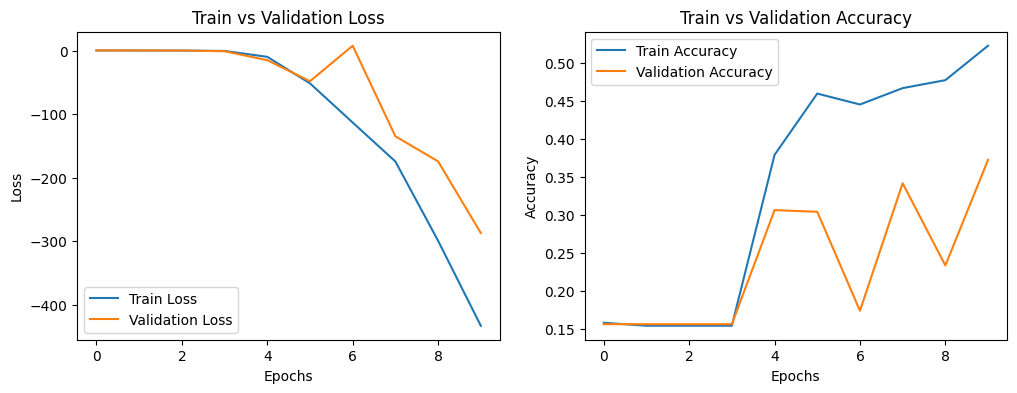

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Impor Data
file_path = '/mnt/data/prastyo-sentiment_all.csv'  # Sesuaikan path dengan lokasi file di Google Colab
data = pd.read_csv(file_path)

# Rename columns
data.columns = ['text', 'label']

# 2. Pra-proses Data
# Misalkan data memiliki kolom 'text' dan 'label'
X = data['text'].values
y = data['label'].values

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

# Pad sequences
maxlen = 100  # Maximum length of sequences
X_train_pad = tf.keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=maxlen)
X_val_pad = tf.keras.preprocessing.sequence.pad_sequences(X_val_seq, maxlen=maxlen)

# 3. Buat Model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=maxlen),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 4. Latih Model
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32, validation_data=(X_val_pad, y_val))

# 5. Plot Grafik
# Plot train vs validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Validation Loss')

# Plot train vs validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train vs Validation Accuracy')

plt.show()